In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 8 ##

## Histogram Review

In [ ]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

In [ ]:
ages = 2019 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [ ]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [ ]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

In [ ]:
num_movies = sum(binned_data.column('Age count'))
num_movies

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [ ]:
binned_data = binned_data.with_column(
    'Percent', binned_data.column('Age count')/num_movies * 100)

In [ ]:
binned_data

## Height

### Question: What is the height of the [40, 65] bin?

In [ ]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [ ]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [ ]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

### What are the heights of the rest of the bins?

In [ ]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [ ]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [ ]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [ ]:
bin_lefts

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

## Visualization Example: Welcome Survey ##

In [3]:
survey = Table.read_table('welcome_survey_sp21.csv')
survey

Timestamp,gender,sleep,grade,ID,stats_yes_no,intro_extra,countries,dread
2021/01/18 11:00:51 AM CST,Female,6,A,7,No,Introverted,10,1
2021/01/18 11:54:09 AM CST,Male,8,A,79,No,Extraverted,2,3
2021/01/18 11:56:14 AM CST,Female,8,A,4,No,Extraverted,0,2
2021/01/18 11:56:48 AM CST,Male,9.25,A,9,Yes,Extraverted,3,1
2021/01/18 11:57:28 AM CST,Female,7,A,8,No,Extraverted,24,2
2021/01/18 11:59:09 AM CST,Female,8,B,4,No,Introverted,3,5
2021/01/18 12:02:41 PM CST,Female,7,B,0,No,Introverted,3,5
2021/01/18 12:12:29 PM CST,Female,10,A,4,Yes,Introverted,12,3
2021/01/18 12:15:46 PM CST,Female,6.5,A,0,No,Introverted,2,1
2021/01/18 12:22:32 PM CST,Female,8,A,0,No,Introverted,5,3


### Categorical Data: Bar Charts

In [4]:
intro_extra = survey.group('intro_extra')
intro_extra

intro_extra,count
Extraverted,11
Introverted,25


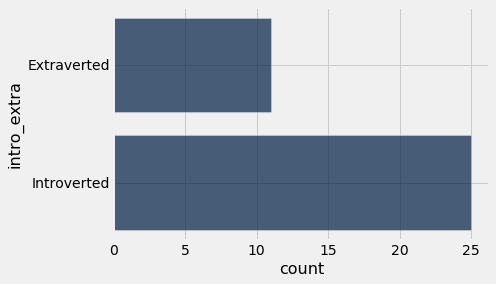

In [7]:
intro_extra.barh('intro_extra')

### Numerical Data: Histograms

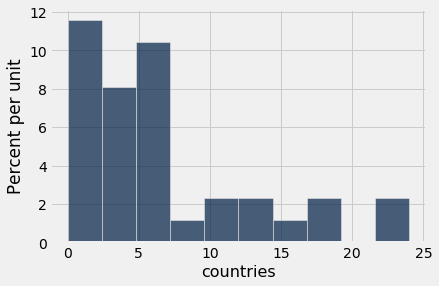

In [8]:
survey.hist('countries')

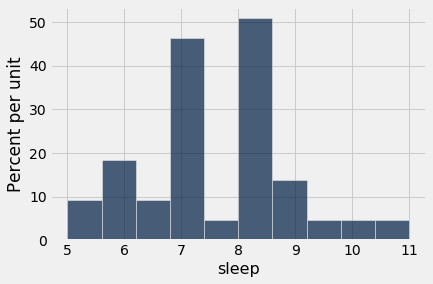

In [9]:
survey.hist('sleep')

In [11]:
min(survey.column('sleep')), max(survey.column('sleep'))

(5.0, 11.0)

In [19]:
sleep_bins = np.arange(5,12,1)

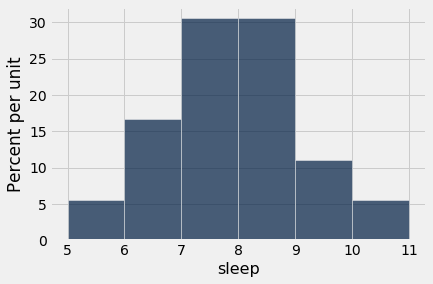

In [20]:
survey.hist('sleep', bins=sleep_bins)

In [21]:
survey.bin('sleep', bins=make_array(0,8,15))

bin,sleep count
0,19
8,17
15,0


In [23]:
19 / (19 + 17) * 100

52.77777777777778

## Functions ##

In [24]:
def triple(x):
    return 3 * x

In [25]:
triple(3)

9

In [26]:
num = 4

In [27]:
triple(num)

12

In [28]:
triple(num * 5)

60

### Type Agnostic

In [29]:
triple('ha')

'hahaha'

In [30]:
triple(np.arange(4))

array([0, 3, 6, 9])

### Discussion Question

In [31]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [32]:
percent_of_total(make_array(1,2,3,4))

array([10., 20., 30., 40.])

In [33]:
percent_of_total(make_array(1, 213, 38))

array([ 0.4 , 84.52, 15.08])

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [ ]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [ ]:
hypotenuse(9, 12)

In [ ]:
hypotenuse(2, 2)

## Apply ##

In [ ]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

In [ ]:
def cap_at_1980(x):
    return min(x, 1980)

In [ ]:
cap_at_1980(1975)

In [ ]:
cap_at_1980(1991)

In [ ]:
ages.apply(cap_at_1980, 'Birth Year')

In [ ]:
def name_and_age(name, year):
    age = 2021 - year
    return name + ' is ' + str(age)

In [ ]:
ages.apply(name_and_age, 'Person', 'Birth Year')